In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
"""Intializes 297 points around 0,0 in x-y plane in data frame df"""
R_min = 25 # in kpc
M = 1e11 # in solar masses

R = []
T = []
for i in range(11):
    T.append(12+3*i)
    R.append(.2 + i*(.05))
    
def rtpairs(r, n):

    df = pd.DataFrame(columns=['X', 'Y'])
    for i in range(len(r)):
        for j in range(n[i]):    
            df = df.append({'X': r[i] * np.cos(j*(2 * np.pi / n[i])),
                            'Y': r[i] * np.sin(j*(2 * np.pi / n[i]))},
                           ignore_index=True)
    return df

df = rtpairs(R, T)
df['Z'] = np.zeros(297)



/tmp/ipykernel_1365/2629422224.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1365/2629422224.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1365/2629422224.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1365/2629422224.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1365/2629422224.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1365/2629422224.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future

In [101]:
def v_0(x, y, M):
    """Intitalizes Velocity in 2d"""
    G = 4.498e-6
    e_soft = 10  #softing parameter  
    r = np.sqrt(x**2 + y ** 2)
    v = np.sqrt( (G*M*r / (r ** 2 + e_soft**2 )  ) )
    theta = np.arccos(x/r)
    vy = v*np.cos(theta)
    theta = np.arcsin(y/r)
    vx = -v*np.sin(theta) 

    print(np.max(theta),np.min(theta))
    return [vx,vy]


df['V_x'] , df['V_y'] = v_0(df['X'],df['Y'],M)
df['V_z'] = np.zeros(297)
print(df)
print(np.max(df['V_x']),np.min(df['V_x']))
print(np.max(df['V_y']),np.min(df['V_y']))

1.5707963267948966 -1.5707963267948966
                X         Y    Z        V_x           V_y  V_z
0    2.000000e-01  0.000000  0.0  -0.000000  2.998734e+01  0.0
1    1.732051e-01  0.100000  0.0 -14.993668  2.596979e+01  0.0
2    1.000000e-01  0.173205  0.0 -25.969795  1.499367e+01  0.0
3    1.224647e-17  0.200000  0.0 -29.987336  1.836195e-15  0.0
4   -1.000000e-01  0.173205  0.0 -25.969795 -1.499367e+01  0.0
..            ...       ...  ...        ...           ...  ...
292  5.131363e-01 -0.476121  0.0  38.072951  4.103288e+01  0.0
293  5.783671e-01 -0.394324  0.0  31.532074  4.624906e+01  0.0
294  6.306782e-01 -0.303719  0.0  24.286822  5.043211e+01  0.0
295  6.689010e-01 -0.206329  0.0  16.499043  5.348858e+01  0.0
296  6.921816e-01 -0.104330  0.0   8.342703  5.535022e+01  0.0

[297 rows x 6 columns]
55.81889642990823 -55.81889642990823
55.97541504323674 -55.97541504323674


In [67]:
"""Graphing vector field to check velocity directions"""
import plotly.graph_objects as go

fig = go.Figure(data = go.Cone(
    x = df['X'],
    y = df['Y'],
    z = df['Z'],
    u = df['V_x'],
    v = df['V_y'],
    w = df['V_z'],
    colorscale = 'Blues',
    sizemode = "absolute",
    sizeref = 40))

fig.update_layout(
    scene = dict(aspectratio = dict(x = 1, y = 1, z = 0.8),
    camera_eye = dict(x = 1.2, y = 1.2, z = 0.6)))

fig.show()

In [68]:
"""Rotates by inclincation angle to df_new"""

theta = np.radians(15)
rot_matrix = np.array([[1, 0, 0],
                       [0, np.cos(theta), -np.sin(theta)],
                       [0, np.sin(theta), np.cos(theta)]])
df_new = pd.DataFrame(columns=['X', 'Y','Z','V_x','V_y','V_z'])

df_new['X'], df_new['Y'], df_new['Z'] = rot_matrix.dot([df['X'],df['Y'],df['Z']])
df_new['V_x'], df_new['V_y'], df_new['V_z'] = rot_matrix.dot([df['V_x'],df['V_y'],df['V_z']])

fig = go.Figure(data = go.Cone(
    x = df_new['X'],
    y = df_new['Y'],
    z = df_new['Z'],
    u = df_new['V_x'],
    v = df_new['V_y'],
    w = df_new['V_z'],
    colorscale = 'Blues',
    sizemode = "absolute",
    sizeref = 40))

fig.update_layout(
    scene = dict(aspectratio = dict(x = 1, y = 1, z = 0.8),
    camera_eye = dict(x = 1.2, y = 1.2, z = 0.6)))

fig.show()


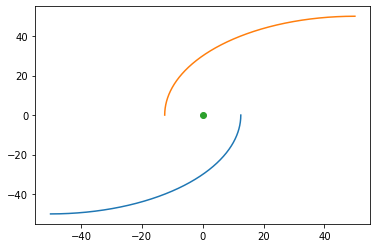

In [159]:
e = .6 # eccentricity
a = 25 / (.4) # in kpc
def int_cen_orbit (theta):
    return a*(1-e**2)/(1-e*np.cos(theta))

tmp_theta = np.linspace(-np.pi,0,10001) #Half an ellispe
Ar_orbit = int_cen_orbit(tmp_theta)
x_A = Ar_orbit*np.cos(tmp_theta)
y_A = Ar_orbit*np.sin(tmp_theta)
tmp_theta = np.linspace(0,np.pi,10001)
Br_orbit = int_cen_orbit(tmp_theta)
x_B = Br_orbit*np.cos(tmp_theta)
y_B = Br_orbit*np.sin(tmp_theta)

#shifting ellispe A and B so Center of Mass is (0,0)
x_A = x_A - 87.5 
x_B = x_B + 100 - 87.5

#ploting at 90 degrees of node, quarter of ellipse
i = int(np.where(y_A == np.min(y_A))[0])
plt.plot(x_A[i::],y_A[i::])

i = int(np.where(y_B == np.max(y_B))[0])
plt.plot(x_B[i::],y_B[i::])

plt.plot(0,0,'o')


In [ ]:
df_Amass = pd.DataFrame(columns=['M','X', 'Y','Z','V_x','V_y','V_z'])
df_Bmass = pd.DataFrame(columns=['M','X', 'Y','Z','V_x','V_y','V_z'])
df_Amass.loc[0] = [1e11,x_A[0],0,0,0,0,0]
df_Bmass.loc[0] = [1e11,x_B[0],0,0,0,0,0]

print(df_Amass)

In [84]:
print(df_Bmass)

              M      X    Y    Z  V_x  V_y  V_z
0  1.000000e+11  112.5  0.0  0.0  0.0  0.0  0.0


In [102]:
vxA, vyA = v_0(x_A[0],0,2*M)
print(vxA,vyA)

0.0 0.0
-0.0 -89.07164510540625


In [103]:
vxB, vyB = v_0(x_B[0],0,2*M)
print(vxB,vyB)

0.0 0.0
-0.0 89.07164510540625
